<a href="https://colab.research.google.com/github/sumayyamunir1/Bike-Sharing-System/blob/master/Student_Group_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Feature Engineering**

---


*   ***EDA(Exploratory Data Analysis)***
















In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer #used for handling missing data
from sklearn.model_selection import train_test_split #used for splitting training and testing data
from sklearn import preprocessing
import seaborn as sns
import statsmodels.api as sm
import pandas as pd #used for handling dataset
import numpy as np #used for handling numbers




**1.**   **Loading dataset into dataframe**



In [0]:
#get csv file and store in a variable bikedata
bikedata=pd.read_csv("/hour.csv")
#assign bikedata to dataframe
dataframe=pd.DataFrame(bikedata)
print(dataframe)

       instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0            1  2011-01-01       1   0  ...     0.0000       3          13   16
1            2  2011-01-01       1   0  ...     0.0000       8          32   40
2            3  2011-01-01       1   0  ...     0.0000       5          27   32
3            4  2011-01-01       1   0  ...     0.0000       3          10   13
4            5  2011-01-01       1   0  ...     0.0000       0           1    1
...        ...         ...     ...  ..  ...        ...     ...         ...  ...
17374    17375  2012-12-31       1   1  ...     0.1642      11         108  119
17375    17376  2012-12-31       1   1  ...     0.1642       8          81   89
17376    17377  2012-12-31       1   1  ...     0.1642       7          83   90
17377    17378  2012-12-31       1   1  ...     0.1343      13          48   61
17378    17379  2012-12-31       1   1  ...     0.1343      12          37   49

[17379 rows x 17 columns]




**2.**   **Display Statistical Summary of dataset**



In [0]:

#statistical summary
print(dataframe.describe())

          instant        season  ...    registered           cnt
count  17379.0000  17379.000000  ...  17379.000000  17379.000000
mean    8690.0000      2.501640  ...    153.786869    189.463088
std     5017.0295      1.106918  ...    151.357286    181.387599
min        1.0000      1.000000  ...      0.000000      1.000000
25%     4345.5000      2.000000  ...     34.000000     40.000000
50%     8690.0000      3.000000  ...    115.000000    142.000000
75%    13034.5000      3.000000  ...    220.000000    281.000000
max    17379.0000      4.000000  ...    886.000000    977.000000

[8 rows x 16 columns]




**3.** **Dataset Information**



In [0]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None




**4.**  **Display first 5 rows of dataset**



In [0]:
#show first 5 rows of dataset
print(dataframe.head(5))


   instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
0        1  2011-01-01       1   0  ...        0.0       3          13   16
1        2  2011-01-01       1   0  ...        0.0       8          32   40
2        3  2011-01-01       1   0  ...        0.0       5          27   32
3        4  2011-01-01       1   0  ...        0.0       3          10   13
4        5  2011-01-01       1   0  ...        0.0       0           1    1

[5 rows x 17 columns]




**5.**   **Display last 5 rows of dataset**



In [0]:
#show last 5 rows of dataset
print(dataframe.tail(5))

       instant      dteday  season  yr  ...  windspeed  casual  registered  cnt
17374    17375  2012-12-31       1   1  ...     0.1642      11         108  119
17375    17376  2012-12-31       1   1  ...     0.1642       8          81   89
17376    17377  2012-12-31       1   1  ...     0.1642       7          83   90
17377    17378  2012-12-31       1   1  ...     0.1343      13          48   61
17378    17379  2012-12-31       1   1  ...     0.1343      12          37   49

[5 rows x 17 columns]




**6. Display dataset columns**



In [0]:
#show dataset columns
dataframe.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')



**7. Missing value analysis**



In [0]:
#Missing value Analysis
print(dataframe.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool




**8.  Checking the types of dataset columns**



In [0]:
#display the different datatypes using dtypes()
dataframe.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object



**9.**  **Feature Correlation**



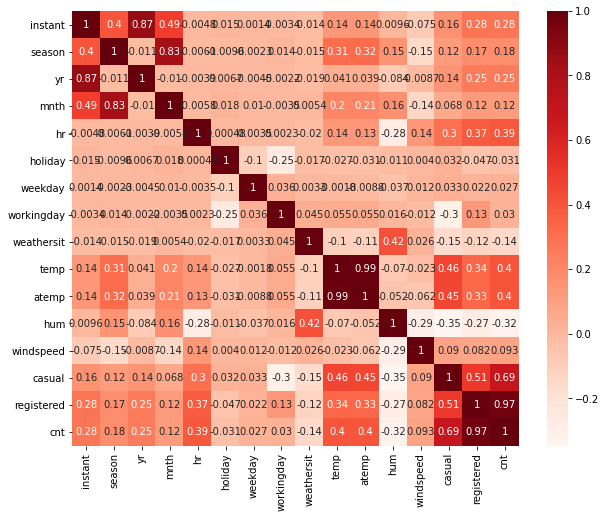

In [0]:
import matplotlib.pyplot as plt
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = dataframe.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
#Correlation with output variable
cor_target = abs(cor["cnt"])
#Selecting highly correlated features
highly_correlated_features = cor_target[cor_target>0.5]
highly_correlated_features

casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

# **Data Distribution and Visualization using Plots**

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
#plot visual and size configuration
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

**how data is distributed on years for count variable**

[Text(0.5, 1.0, 'Year distribution of counts')]

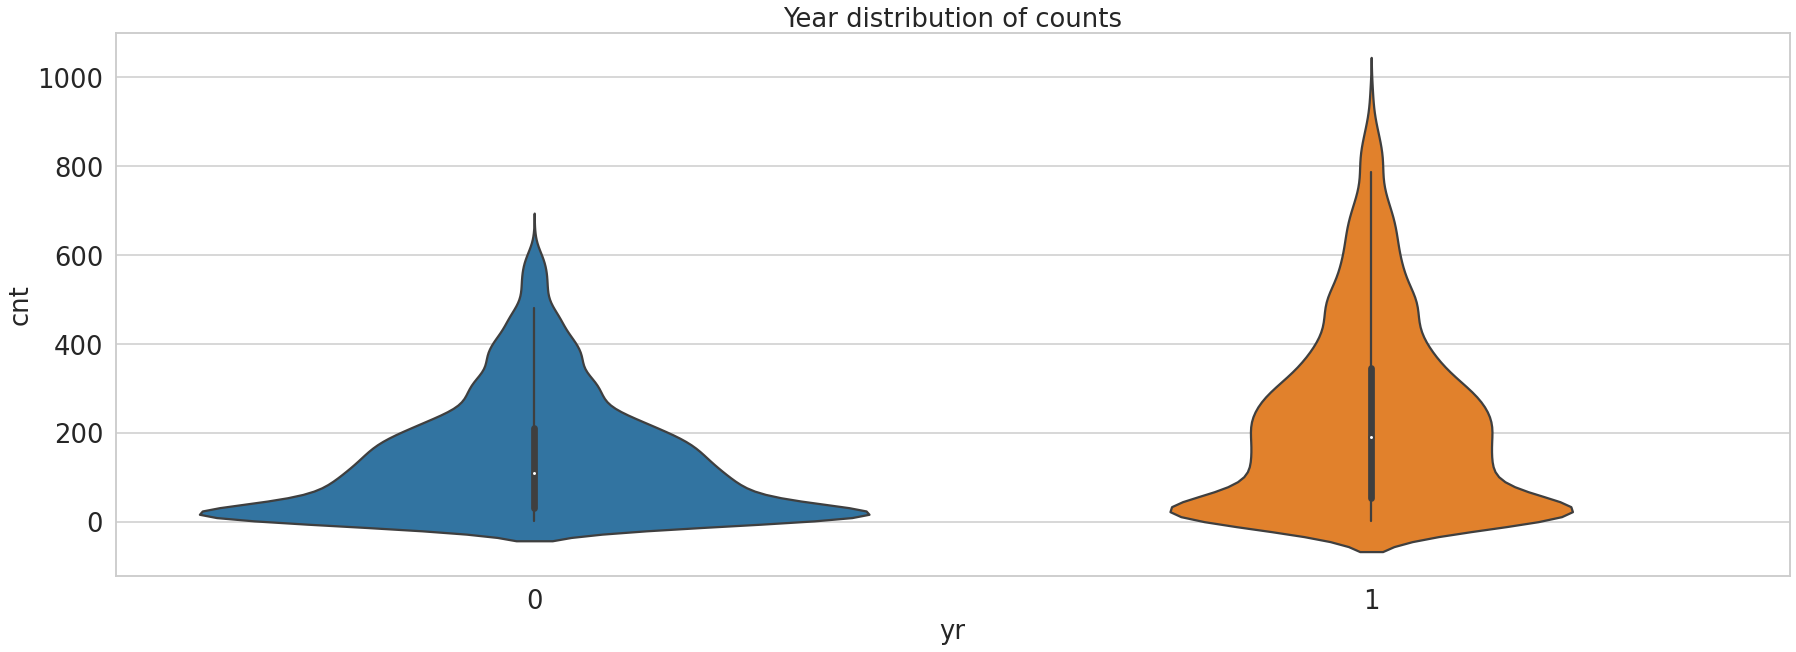

In [0]:
fig,ax = plt.subplots()
sns.violinplot(data=dataframe[['yr',
                           'cnt']],
              x='yr',
              y='cnt',
              ax=ax)
ax.set(title="Year distribution of counts")

**how data is distributed on months for count variable**

[Text(0.5, 1.0, 'Monthly distribution of counts')]

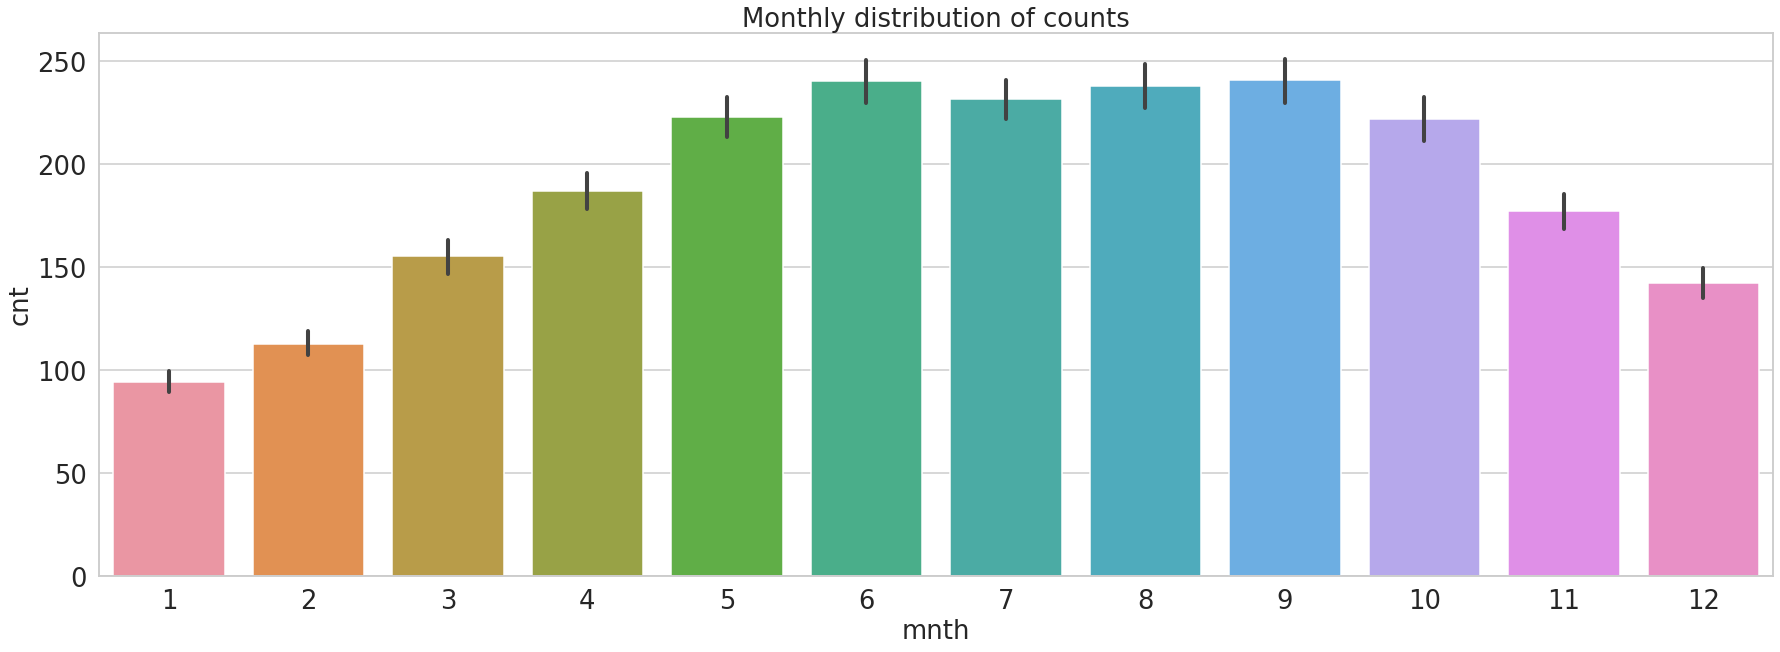

In [0]:
fig,ax = plt.subplots()
sns.barplot(data=dataframe[['mnth',
                           'cnt']],
              x='mnth',
              y='cnt',
              ax=ax)
ax.set(title="Monthly distribution of counts")

**Season distribution of count**

[Text(0.5, 1.0, 'distribution of counts on Season')]

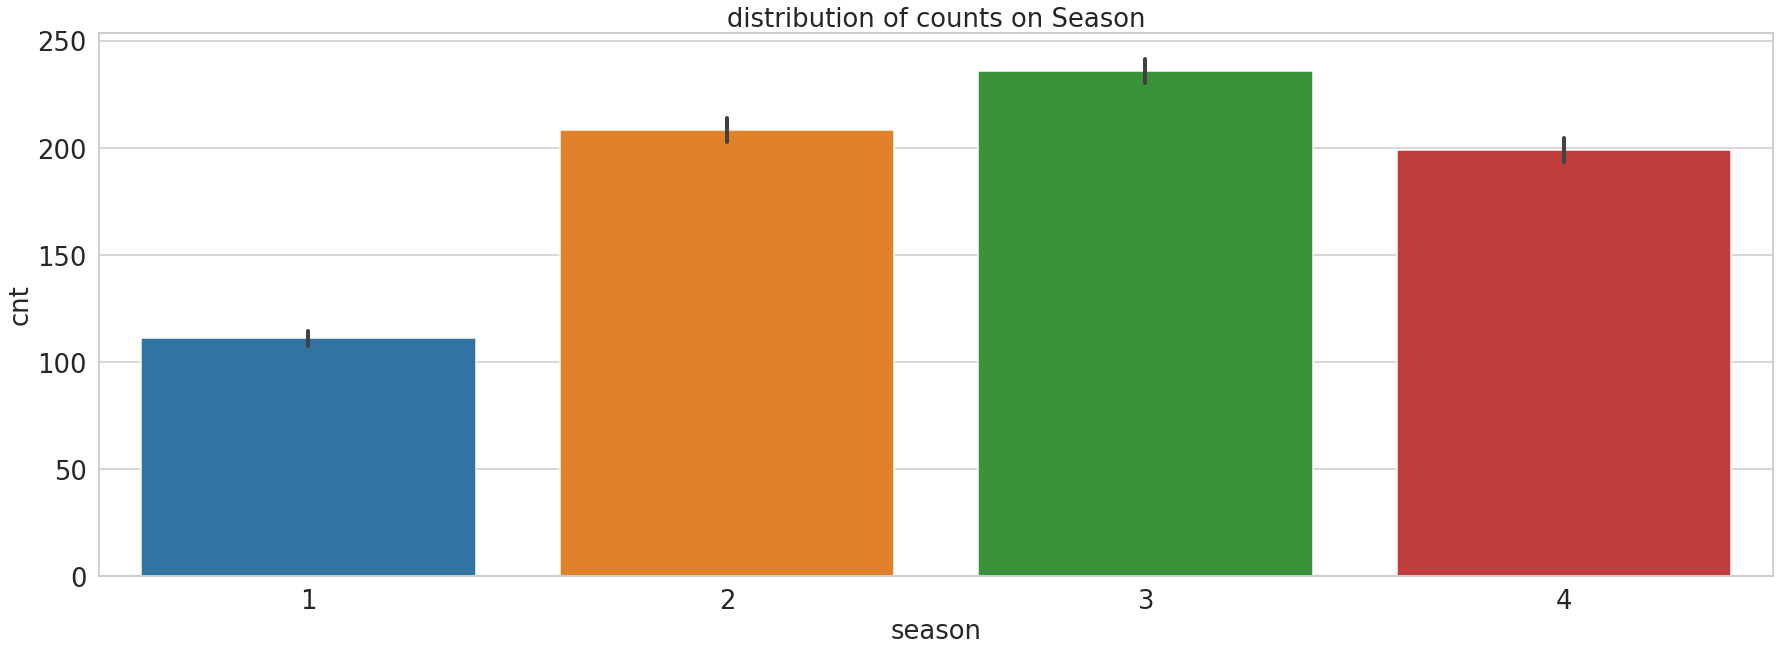

In [0]:
fig,ax = plt.subplots()
sns.barplot(data=dataframe[['season',
                           'cnt']],
              x='season',
              y='cnt',
              ax=ax)
ax.set(title="distribution of counts on Season")


*   ***Dimentionality Reduction using PCA(Principal Component Analysis***



In [0]:
#drop useless columns(instant and dteday) by applying PCA feature selection
preprocesseddataframe=dataframe.drop(columns=['instant','dteday'])
print(preprocesseddataframe.head(5))

   season  yr  mnth  hr  holiday  ...   hum  windspeed  casual  registered  cnt
0       1   0     1   0        0  ...  0.81        0.0       3          13   16
1       1   0     1   1        0  ...  0.80        0.0       8          32   40
2       1   0     1   2        0  ...  0.80        0.0       5          27   32
3       1   0     1   3        0  ...  0.75        0.0       3          10   13
4       1   0     1   4        0  ...  0.75        0.0       0           1    1

[5 rows x 15 columns]




*   ***Feature Split***





**1. Splitting independent and dependent features**



In [0]:
#Normalizing the data by splitting the attributes into independent and target variable (dependent variable)
X_independent=preprocesseddataframe.iloc[:,:-1].values #all coulumns except the last 
Y_dependent=preprocesseddataframe.iloc[:,-1].values#only the last coulumn
print(X_independent)
print(Y_dependent)


[[ 1.      0.      1.     ...  0.      3.     13.    ]
 [ 1.      0.      1.     ...  0.      8.     32.    ]
 [ 1.      0.      1.     ...  0.      5.     27.    ]
 ...
 [ 1.      1.     12.     ...  0.1642  7.     83.    ]
 [ 1.      1.     12.     ...  0.1343 13.     48.    ]
 [ 1.      1.     12.     ...  0.1343 12.     37.    ]]
[16 40 32 ... 90 61 49]




**2.**   **Dimension of dataset** 



In [0]:
#checking dimensions of dataset means how target features is distributed 
print(X_independent.shape)
print(Y_dependent.shape)

(17379, 14)
(17379,)




**3. Train(80%) and test(20%) split**



In [0]:
#splitting dataset into training(80%) and testing(20) set
X_train,X_test,Y_train,Y_test=train_test_split(X_independent,Y_dependent,test_size=0.2,random_state=0)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[1.000e+00 1.000e+00 1.000e+00 ... 2.985e-01 5.200e+01 1.050e+02]
 [1.000e+00 0.000e+00 1.200e+01 ... 1.642e-01 9.000e+00 1.550e+02]
 [1.000e+00 0.000e+00 3.000e+00 ... 3.284e-01 1.000e+01 6.900e+01]
 ...
 [1.000e+00 1.000e+00 2.000e+00 ... 3.582e-01 0.000e+00 6.000e+00]
 [2.000e+00 1.000e+00 3.000e+00 ... 2.537e-01 1.400e+01 5.500e+01]
 [2.000e+00 0.000e+00 4.000e+00 ... 3.582e-01 4.400e+01 4.860e+02]]
[157 164  79 ...   6  69 530]
[[2.000e+00 0.000e+00 5.000e+00 ... 2.239e-01 4.000e+00 3.000e+00]
 [4.000e+00 0.000e+00 1.000e+01 ... 0.000e+00 1.000e+00 4.000e+00]
 [4.000e+00 1.000e+00 1.000e+01 ... 1.343e-01 8.100e+01 6.620e+02]
 ...
 [3.000e+00 0.000e+00 8.000e+00 ... 1.045e-01 1.300e+01 2.100e+01]
 [1.000e+00 1.000e+00 1.200e+01 ... 1.045e-01 0.000e+00 7.000e+00]
 [4.000e+00 1.000e+00 1.100e+01 ... 2.239e-01 1.500e+01 3.560e+02]]
[  7   5 743 ...  34   7 371]


**4. Normalization**

In [0]:
#apply MinMaxScaler to organize the data in same range for both testing and training
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_sc = X_train
X_test_sc = X_test
X_train_sc[:,8:14]=scaler.fit_transform(X_train[:,8:14])
X_test_sc[:,8:14]=scaler.transform(X_test[:,8:14])
X_train,X_test,Y_train,Y_test=train_test_split(X_independent,Y_dependent,test_size=0.2,random_state=0)
print(X_train_sc)
print(X_test_sc)


# **Model Implementation**


**1.**   **Random Forest**




In [0]:
#splitting dataset into training(80%) and testing(20) set
X_train,X_test,Y_train,Y_test=train_test_split(X_independent,Y_dependent,test_size=0.2,random_state=0)

#model creation
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)
y_test_pred=model.predict(X_test)
y_train_pred= model.predict(X_train)

#make prediction for train data
mse = mean_squared_error(Y_train, y_train_pred)
r = r2_score(Y_train, y_train_pred)
mae = mean_absolute_error(Y_train, y_train_pred)

print("----Results for Random Forest on training-----")
print("1....Mean Squared Error: ",mse)
print("2....R score:   ",r)
print("3....Mean Absolute Error: ",mae)

#make prediction for test data
mse = mean_squared_error(Y_test, y_test_pred)
r = r2_score(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test,y_test_pred)
print("-----------------------------------------")
print("------Results for Random Forest on Testing-----")
print("1.....Mean Squared Error: ",mse)
print("2.....R score:  ",r)
print("3.....Mean Absolute Error: ",mae)


----Results for Random Forest on training-----
1....Mean Squared Error:  0.8808803639502265
2....R score:    0.9999731291250359
3....Mean Absolute Error:  0.3706329569157734
-----------------------------------------
------Results for Random Forest on Testing-----
1.....Mean Squared Error:  14.05616418296892
2.....R score:   0.9995787671324237
3.....Mean Absolute Error:  1.022638089758343


**Random Forest Parameter Tuning**

In [0]:
#splitting dataset into training(80%) and testing(20) set
X_train,X_test,Y_train,Y_test=train_test_split(X_independent,Y_dependent,test_size=0.2,random_state=0)

#model implementation
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators= 1000, n_jobs = -1,
                              random_state =54,max_features = "auto",
                              min_samples_leaf = 1)
model.fit(X_train,Y_train)
y_test_pred=model.predict(X_test)
y_train_pred= model.predict(X_train)

#make prediction for train data
mse = mean_squared_error(Y_train, y_train_pred)
r = r2_score(Y_train, y_train_pred)
mae = mean_absolute_error(Y_train, y_train_pred)

print("----Results for Random Forest on training-----")
print("1....Mean Squared Error: ",mse)
print("2....R score:   ",r)
print("3....Mean Absolute Error: ",mae)

#make prediction for test data
mse = mean_squared_error(Y_test, y_test_pred)
r = r2_score(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test,y_test_pred)
print("-----------------------------------------")
print("------Results for Random Forest on Testing-----")
print("1.....Mean Squared Error: ",mse)
print("2.....R score:  ",r)
print("3.....Mean Absolute Error: ",mae)

----Results for Random Forest on training-----
1....Mean Squared Error:  0.7935293857440846
2....R score:    0.9999757937288907
3....Mean Absolute Error:  0.3317975976407971
-----------------------------------------
------Results for Random Forest on Testing-----
1.....Mean Squared Error:  13.599663976985042
2.....R score:   0.9995924474571775
3.....Mean Absolute Error:  0.9793360184119676


**Feature Importance using Random Forest**

Feature ranking:
1. feature registered (0.950451)
2. feature casual (0.049289)
3. feature hum (0.000047)
4. feature windspeed (0.000035)
5. feature hour (0.000034)
6. feature temp (0.000030)
7. feature atemp (0.000030)
8. feature mnth (0.000025)
9. feature weekday (0.000018)
10. feature season (0.000012)
11. feature yr (0.000011)
12. feature workingday (0.000010)
13. feature weathersit (0.000007)
14. feature holiday (0.000001)


<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

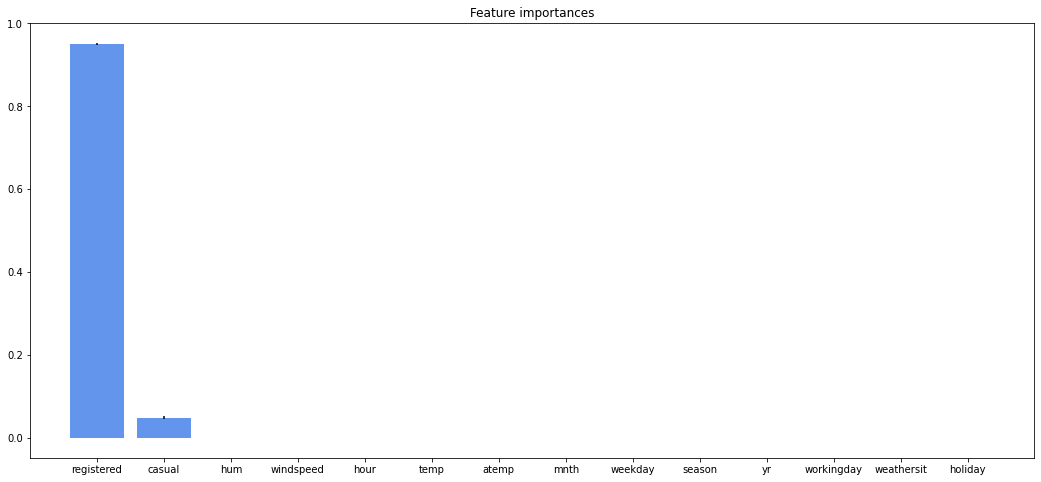

In [0]:

import matplotlib.pyplot as plt
#feature importance using Random Forest
columns = ['season', 'yr', 'mnth','hour', 'holiday', 'weekday', 'workingday','weathersit', 'temp', 'atemp','hum', 'windspeed','casual', 'registered']
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, columns[indices[f]], importances[indices[f]]))
    plt.figure(figsize=(18,8))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(X_test.shape[1]), [columns[i] for i in indices])
plt.xlim([-1, X_test.shape[1]])
plt.show()



**2.**   **XGBoost**



In [0]:

#splitting dataset into training(80%) and testing(20) set
X_train,X_test,Y_train,Y_test=train_test_split(X_independent,Y_dependent,test_size=0.2,random_state=0)

#inserting train data to xgboost
from xgboost import XGBRegressor
regresser=XGBRegressor()
regresser.fit(X_train,Y_train)
y_test_pred=regresser.predict(X_test)
y_train_pred= regresser.predict(X_train)

#make prediction for train data
mse = mean_squared_error(Y_train, y_train_pred)
r = r2_score(Y_train, y_train_pred)
mae = mean_absolute_error(Y_train, y_train_pred)

print("----Results for xgboost on training-----")
print("1....Mean Squared Error: ",mse)
print("2....R score:   ",r)
print("3....Mean Absolute Error: ",mae)

#make prediction for test data
r = r2_score(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test,y_test_pred)
mse = mean_squared_error(Y_test, y_test_pred)
print("-----------------------------------------")
print("----Results for xgboost on testing-----")
print("1....Mean Squared Error: ",mse)
print("2....R score:   ",r)
print("3....Mean Absolute Error: ",mae)




[03:20:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
----Results for xgboost on training-----
1....Mean Squared Error:  22.083561771934544
2....R score:    0.9993263504881922
3....Mean Absolute Error:  3.034984065887354
-----------------------------------------
----Results for xgboost on testing-----
1....Mean Squared Error:  33.155326390612196
2....R score:    0.9990064065111114
3....Mean Absolute Error:  3.4216050620869196


**XGBoost Parameter Tuning**

In [0]:

#splitting dataset into training(80%) and testing(20) set
X_train,X_test,Y_train,Y_test=train_test_split(X_independent,Y_dependent,test_size=0.2,random_state=0)

#inserting train data to xgboost
from xgboost import XGBRegressor
regresser=XGBRegressor(objective ='reg:squarederror', gamma=0, 
                       colsample_bytree = 1, learning_rate = 0.1,
                  max_depth = 10, alpha = 8, n_estimators = 600 ,
                               min_child_weight= 5 , subsample=1)
regresser.fit(X_train,Y_train)
y_test_pred=regresser.predict(X_test)
y_train_pred= regresser.predict(X_train)

#make prediction for train data
mse = mean_squared_error(Y_train, y_train_pred)
r = r2_score(Y_train, y_train_pred)
mae = mean_absolute_error(Y_train, y_train_pred)

print("----Results for xgboost on training-----")
print("1....Mean Squared Error: ",mse)
print("2....R score:   ",r)
print("3....Mean Absolute Error: ",mae)

#make prediction for test data
r = r2_score(Y_test, y_test_pred)
mae = mean_absolute_error(Y_test,y_test_pred)
mse = mean_squared_error(Y_test, y_test_pred)
print("-----------------------------------------")
print("----Results for xgboost on testing-----")
print("1....Mean Squared Error: ",mse)
print("2....R score:   ",r)
print("3....Mean Absolute Error: ",mae)


----Results for xgboost on training-----
1....Mean Squared Error:  0.08389295395652736
2....R score:    0.9999974408816811
3....Mean Absolute Error:  0.19032054519615593
-----------------------------------------
----Results for xgboost on testing-----
1....Mean Squared Error:  6.844460960492526
2....R score:    0.9997948862947336
3....Mean Absolute Error:  1.0078734965915648




  **Feature scaling**




In [0]:
#apply MinMaxScaler to organize the data in same range for both testing and training
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_sc = X_train
X_test_sc = X_test
X_train_sc[:,8:14]=scaler.fit_transform(X_train[:,8:14])
X_test_sc[:,8:14]=scaler.transform(X_test[:,8:14])
X_train,X_test,Y_train,Y_test=train_test_split(X_independent,Y_dependent,test_size=0.2,random_state=0)
print(X_train_sc)
print(X_test_sc)


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 3.50887504e-01
  1.43646409e-01 1.18644068e-01]
 [1.00000000e+00 0.00000000e+00 1.20000000e+01 ... 1.93017515e-01
  2.48618785e-02 1.75141243e-01]
 [1.00000000e+00 0.00000000e+00 3.00000000e+00 ... 3.86035030e-01
  2.76243094e-02 7.79661017e-02]
 ...
 [1.00000000e+00 1.00000000e+00 2.00000000e+00 ... 4.21065005e-01
  0.00000000e+00 6.77966102e-03]
 [2.00000000e+00 1.00000000e+00 3.00000000e+00 ... 2.98224991e-01
  3.86740331e-02 6.21468927e-02]
 [2.00000000e+00 0.00000000e+00 4.00000000e+00 ... 4.21065005e-01
  1.21546961e-01 5.49152542e-01]]
[[2.00000000e+00 0.00000000e+00 5.00000000e+00 ... 2.63195016e-01
  1.10497238e-02 3.38983051e-03]
 [4.00000000e+00 0.00000000e+00 1.00000000e+01 ... 0.00000000e+00
  2.76243094e-03 4.51977401e-03]
 [4.00000000e+00 1.00000000e+00 1.00000000e+01 ... 1.57869989e-01
  2.23756906e-01 7.48022599e-01]
 ...
 [3.00000000e+00 0.00000000e+00 8.00000000e+00 ... 1.22840014e-01
  3.59116022e-02 2.37288136e-02]



**3. Decision Tree**



In [0]:
#apply MinMaxScaler to organize the data in same range for both testing and training
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_sc = X_train
X_test_sc = X_test
X_train_sc[:,8:14]=scaler.fit_transform(X_train[:,8:14])
X_test_sc[:,8:14]=scaler.transform(X_test[:,8:14])
X_train,X_test,Y_train,Y_test=train_test_split(X_independent,Y_dependent,test_size=0.2,random_state=0)

#decision tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train_sc, Y_train)
y_predicted = regressor.predict(X_test_sc)
y_train_pred= regressor.predict(X_train_sc)

#make prediction for train data
mse = mean_squared_error(Y_train, y_train_pred)
r = r2_score(Y_train, y_train_pred)
mae = mean_absolute_error(Y_train, y_train_pred)

print("----Results for  Decision Tree on training-----")
print("1....Mean Squared Error: ",mse)
print("2....R score:   ",r)
print("3....Mean Absolute Error: ",mae)


mse = mean_squared_error(Y_test, y_predicted)
r = r2_score(Y_test, y_predicted)
mae = mean_absolute_error(Y_test,y_predicted)
print("-----------------------------------------")
print("----Results for Decision Tree on Testing-----")
print("1....Mean Squared Error: ",mse)
print("2....R score:  ",r)
print("3....Mean Absolute Error: ",mae)





----Results for  Decision Tree on training-----
1....Mean Squared Error:  0.0
2....R score:    1.0
3....Mean Absolute Error:  0.0
-----------------------------------------
----Results for Decision Tree on Testing-----
1....Mean Squared Error:  33.525028768699656
2....R score:   0.9989953273297042
3....Mean Absolute Error:  2.4404487917146147
